<a href="https://colab.research.google.com/github/Goshikhar23/DL-back-to-the-basics/blob/master/PyTorchCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Data Loading
import torchvision
import torchvision.transforms as transforms

# Data Loading

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(images[0].shape)
print(labels.shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([4])
8


# Visualize Data

In [ ]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


Converting to numpy to plot

In [ ]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [ ]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


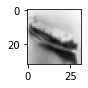

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(npimg)
plt.show()

In [ ]:
def imshow(img):
  npimg = img.numpy()
  npimg = np.transpose(npimg, (1, 2, 0))
  plt.imshow(npimg)
  plt.show()

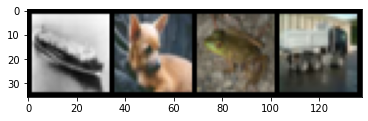

ship dog frog truck


In [ ]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# Single Convolution Layer

In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3)     # (num_channels, num_filters, size_filter, padding=(1,1), stride= (2,2))
  
  def forward(self, x):
    x = self.conv1(x)
    return x

In [ ]:
net = FirstCNN()

In [ ]:
out = net(images)
out.shape

torch.Size([4, 16, 30, 30])

In [ ]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


# Different representations of image

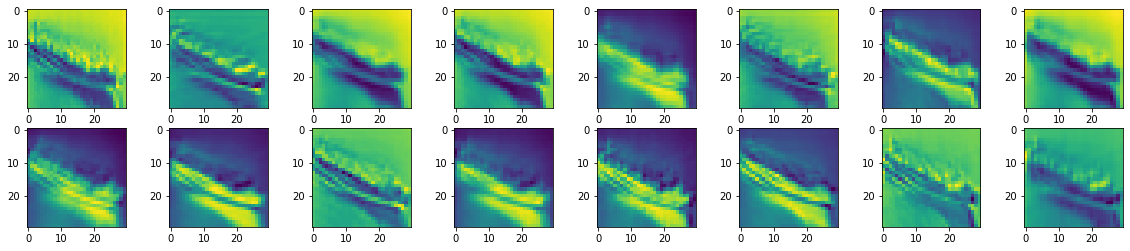

In [ ]:
plt.figure(figsize=(20,4))
for i in range(16):
  out1 = out[0, i, :, :].detach().numpy()
  plt.subplot(2, 8, i+1)
  plt.imshow(out1)
plt.show()  

# Deep Convolution Network

In [ ]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2, self).__init__()

    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3),    # (N, 3, 32, 32) -> (N, 8, 30, 30)
        nn.Conv2d(8, 16, 3)    # (N, 8, 30, 30) -> (N, 16, 28, 28)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [ ]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

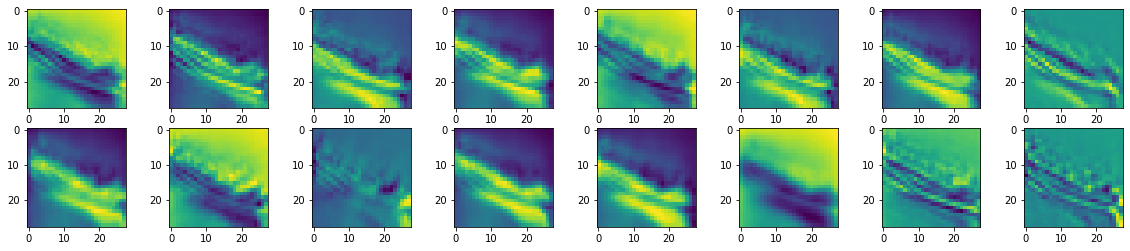

In [ ]:
plt.figure(figsize=(20,4))
for i in range(out.shape[1]):
  out1 = out[0, i, :, :].detach().numpy()
  plt.subplot(2, 8, i+1)
  plt.imshow(out1)
plt.show()  

# Experimenting

In [ ]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3, self).__init__()

    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 3),    # (N, 3, 32, 32) -> (N, 6, 30, 30)
        nn.MaxPool2d(2, stride=2),   # (N, 6, 30, 30) ->  (N, 6, 15, 15)
        nn.Conv2d(6, 16, 3)    # (N, 6, 15, 15) -> (N, 16, 13, 13)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [ ]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 13, 13])

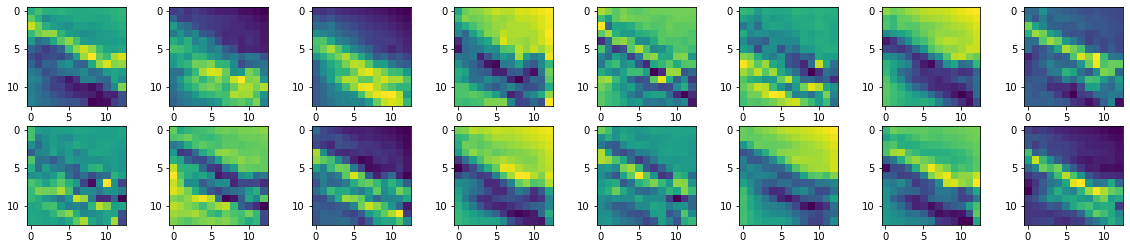

In [ ]:
plt.figure(figsize=(20,4))
for i in range(out.shape[1]):
  out1 = out[0, i, :, :].detach().numpy()
  plt.subplot(2, 8, i+1)
  plt.imshow(out1)
plt.show()  

# LeNet

In [ ]:
!wget "https://dpzbhybb2pdcj.cloudfront.net/elgendy/v-3/Figures/05_01.png"

--2020-07-22 12:03:00--  https://dpzbhybb2pdcj.cloudfront.net/elgendy/v-3/Figures/05_01.png
Resolving dpzbhybb2pdcj.cloudfront.net (dpzbhybb2pdcj.cloudfront.net)... 52.84.122.208, 52.84.122.157, 52.84.122.39, ...
Connecting to dpzbhybb2pdcj.cloudfront.net (dpzbhybb2pdcj.cloudfront.net)|52.84.122.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146513 (143K) [image/png]
Saving to: ‘05_01.png.2’

05_01.png.2         100%[===================>] 143.08K  --.-KB/s    in 0.03s   

2020-07-22 12:03:00 (5.28 MB/s) - ‘05_01.png.2’ saved [146513/146513]



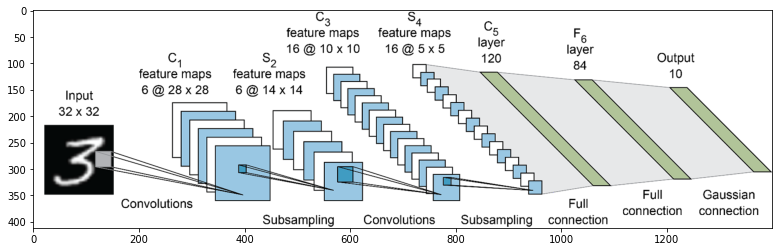

In [ ]:
LeNet_im = plt.imread("/content/05_01.png")
plt.figure(figsize=(18,4))
plt.imshow(LeNet_im)
plt.show()

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()

    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),            # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),     # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),           # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)      # (N, 16, 10, 10) -> (N, 16, 5, 5)
                                  )
    
    self.fc_model = nn.Sequential(
        nn.Linear(16*5*5, 120),      # (N, 16*5*5=400) -> (N, 120)
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10) 
    )
  
  def forward(self, x):
    print(x.shape)
    x = self.cnn_model(x)
    print(x.shape)
    x = x.view(x.size(0), -1)
    print(x.shape)
    x = self.fc_model(x)
    print(x.shape)
    return x

In [ ]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [ ]:
print(out)

tensor([[ 0.0023,  0.1263, -0.1034,  0.0776, -0.1546, -0.0578,  0.0186,  0.0163,
          0.0925, -0.0925],
        [ 0.0198,  0.1017, -0.0824,  0.0745, -0.1442, -0.0436,  0.0099,  0.0044,
          0.0660, -0.1024],
        [ 0.0349,  0.1007, -0.0861,  0.0831, -0.1399, -0.0377,  0.0109, -0.0114,
          0.0616, -0.0957],
        [ 0.0234,  0.1139, -0.0855,  0.0823, -0.1456, -0.0488,  0.0156,  0.0037,
          0.0761, -0.0926]], grad_fn=<AddmmBackward>)


## Training LeNet on GPU

In [ ]:
#device = torch.device("cpu")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
batch_size =128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size =batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()

    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),            # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),     # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),           # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)      # (N, 16, 10, 10) -> (N, 16, 5, 5)
                                  )
    
    self.fc_model = nn.Sequential(
        nn.Linear(16*5*5, 120),      # (N, 16*5*5=400) -> (N, 120)
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10) 
    )
  
  def forward(self, x):
    
    x = self.cnn_model(x)
    
    x = x.view(x.size(0), -1)
    
    x = self.fc_model(x)
    
    return x

In [ ]:
net = LeNet().to(device)

In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.72, Train acc: 38.08
Epoch: 1/16, Test acc: 42.39, Train acc: 42.59
Epoch: 2/16, Test acc: 44.71, Train acc: 45.46
Epoch: 3/16, Test acc: 48.92, Train acc: 50.26
Epoch: 4/16, Test acc: 50.43, Train acc: 52.01
Epoch: 5/16, Test acc: 51.43, Train acc: 54.28
Epoch: 6/16, Test acc: 52.79, Train acc: 56.45
Epoch: 7/16, Test acc: 54.12, Train acc: 58.11
Epoch: 8/16, Test acc: 54.29, Train acc: 59.27
Epoch: 9/16, Test acc: 54.23, Train acc: 60.13
Epoch: 10/16, Test acc: 54.59, Train acc: 60.78
Epoch: 11/16, Test acc: 54.78, Train acc: 62.23
Epoch: 12/16, Test acc: 56.05, Train acc: 63.52
Epoch: 13/16, Test acc: 55.93, Train acc: 63.77
Epoch: 14/16, Test acc: 55.88, Train acc: 64.90
Epoch: 15/16, Test acc: 55.19, Train acc: 65.40


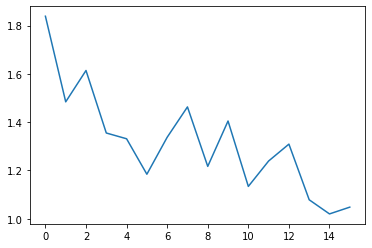

CPU times: user 5min 23s, sys: 6.8 s, total: 5min 30s
Wall time: 5min 30s


In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs =16

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):
    
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
plt.plot(loss_epoch_arr)
plt.show()